# Evaluating Multiple Model

### Different models for different problems

#### Some guiding principles

- Size of the dataset
    - Fewer features = simpler model, faster training time
    - Some models require very large data to perform well
- Interpretability
    - Some models are easy to explain, wich can be important for stakeholders
    - Linear regression has a high interpretability
- Flexibility
    - May improve accuracy, by making fewer assumptions about the data
    - KNN is a more flexible model, doesn't assume any linear relationships

#### It's all in the metrics

- Regression model performance:
    - RMSE
    - R-squared
- Classification model performance:
    - Accuracy
    - Confusion matrix
    - Precision, recall, F1 score
    - ROC AUC

- Train several models and evaluate performance out of the box

#### A note on scaling

- Models affected by scaling:
    - KNN
    - Linear Regression, Ridge, Lasso
    - Logistic Regression
    - Artificial Neural Network

In [1]:
import pandas as pd
music_df = pd.read_csv('music.csv')
music_df = music_df.drop('Unnamed: 0', axis=1)

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [7]:
X= music_df.drop('genre', axis=1).values
y= music_df['genre'].values
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


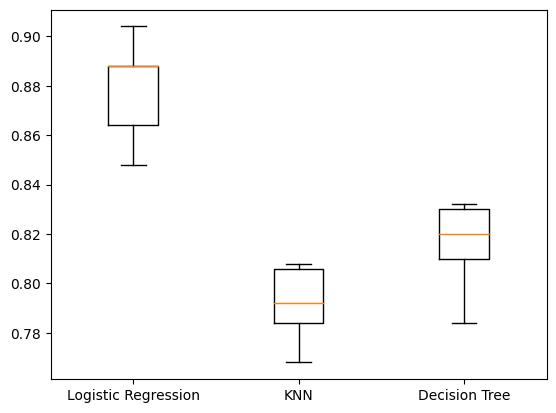

In [8]:
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels= models.keys())
plt.show()
    

##### Test set performance


In [10]:
for name in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(name, test_score)
    

('Logistic Regression', LogisticRegression()) 0.788
('KNN', KNeighborsClassifier()) 0.768
('Decision Tree', DecisionTreeClassifier()) 0.768


In [3]:
import numpy as np
array = np.array(["Jazz"
,"Rap"
,"Electronic"
,"Rock"
,"Rap"
,"Alternative"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Classical"
,"Rock"
,"Rock"
,"Blues"
,"Rock"
,"Rock"
,"Blues"
,"Rap"
,"Anime"
,"Rock"
,"Country"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Alternative"
,"Rock"
,"Electronic"
,"Rock"
,"Rap"
,"Rock"
,"HipHop"
,"Rock"
,"Rock"
,"Rock"
,"Jazz"
,"Rock"
,"Blues"
,"Rock"
,"HipHop"
,"Classical"
,"Classical"
,"Rock"
,"Electronic"
,"Electronic"
,"Rap"
,"Country"
,"Jazz"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Blues"
,"Rock"
,"Electronic"
,"Electronic"
,"Alternative"
,"Jazz"
,"HipHop"
,"Electronic"
,"Country"
,"Anime"
,"Anime"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Electronic"
,"Rock"
,"Jazz"
,"Rock"
,"Rock"
,"Alternative"
,"Alternative"
,"Rock"
,"Classical"
,"Rock"
,"Rock"
,"Rock"
,"Blues"
,"HipHop"
,"Country"
,"Rock"
,"Jazz"
,"Jazz"
,"Rock"
,"Rock"
,"Alternative"
,"Rock"
,"Rock"
,"HipHop"
,"Rock"
,"Anime"
,"Rock"
,"Blues"
,"Rap"
,"HipHop"
,"Alternative"
,"Classical"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"Rock"
,"HipHop"
,"Blues"
,"Rock"
,"Country"
,"HipHop"
,"Rap"
,"Rock"])

In [4]:
music_df=pd.read_csv('music.csv')
music_df= music_df.drop(columns=['genre', 'Unnamed: 0'])
music_df= music_df.iloc[:120]
music_df['genre']= array
music_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934000,0.618,Jazz
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012000,0.637,Rap
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897000,0.228,Electronic
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063000,0.323,Rock
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995000,0.300,Rap
...,...,...,...,...,...,...,...,...,...,...,...,...
115,56.0,0.083200,0.392,268467.0,0.835,0.009820,0.0769,-6.553,0.0596,144.641000,0.120,Rock
116,64.0,0.170000,0.505,-1.0,0.837,0.000000,0.1130,-5.146,0.0358,140.066000,0.623,Country
117,54.0,0.655000,0.699,252067.0,0.197,0.000000,0.0716,-14.792,0.0383,122.871000,0.361,HipHop
118,68.0,0.000406,0.487,160886.0,0.888,0.001040,0.4050,-4.736,0.0887,137.939000,0.563,Rap


In [5]:
music_dummies= pd.get_dummies(music_df['genre'], drop_first=True)
music_df= pd.concat([music_df, music_dummies], axis=1)
music_df=music_df.drop('genre', axis=1)
music_df.head(1)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Anime,Blues,Classical,Country,Electronic,HipHop,Jazz,Rap,Rock
0,60.0,0.896,0.726,214547.0,0.177,0.000002,0.116,-14.824,0.0353,92.934,0.618,False,False,False,False,False,False,True,False,False


In [6]:
X= music_df.drop('energy', axis=1).values
y= music_df['energy'].values
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

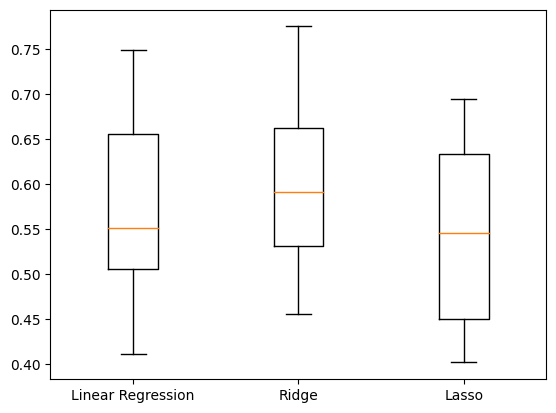

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
results = []
models = {'Linear Regression': LinearRegression(), 
          'Ridge': Ridge(alpha=0.1),
          'Lasso': Lasso(alpha=0.1)}
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys() )
plt.show()
    
    

In [9]:
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for name in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(name, test_rmse)
    

('Linear Regression', LinearRegression()) 0.181427021778917
('Ridge', Ridge(alpha=0.1)) 0.181427021778917
('Lasso', Lasso(alpha=0.1)) 0.181427021778917


Visualizing Classification Model Performance

In [ ]:
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

for model in models.values():
    
  kf = KFold(n_splits=6, random_state=12, shuffle=True)

  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

Pipeline for predicting song popularity

In [ ]:
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))